## Clustering Analysis, using Hierarchical and Kmeans

In [26]:
import numpy as np           
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import sys
import os
# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
import google_drive as gd
from prepare_dataset import split_data_into_test_and_train
from prepare_dataset import merge_happiness_alcohol_fertility_migration

In [27]:
from build_pipeline import build_pipeline_for_clustering
X_train, X_val, X_test = build_pipeline_for_clustering()

c:\Users\veron\Desktop\9th semester\MAL1\MAL1_Group_Assignemnt\assignment-7\prepare_dataset.py:61: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:

X_train_num = X_train.select_dtypes(include=['number', 'bool'])
X_train_num = X_train_num.drop(columns = 'Happines_Score')

## PCA - What is the most important ? 

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_train_num)

In [30]:
pca.explained_variance_ratio_

array([0.79362421, 0.05105385, 0.04835638, 0.03327742, 0.02164799,
       0.01700181, 0.01194753, 0.00841348, 0.00552079, 0.00468214])

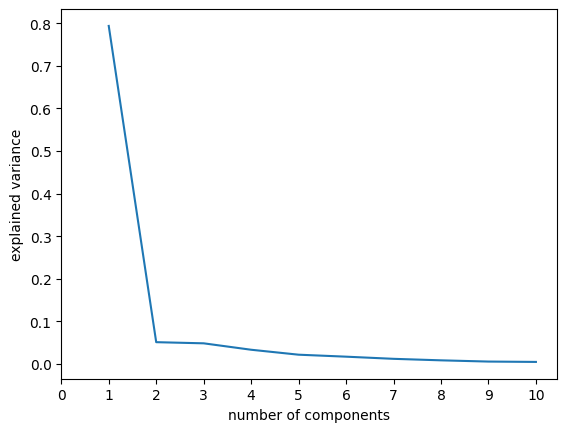

In [31]:
#Explained variance vs. number of components
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

In [32]:
pca_2 = PCA(2)
X_pca_2 = pca_2.fit_transform(X_train_num)
# lets check how much variance is explained by the two components
print(pca_2.explained_variance_ratio_)
print("Sum of explained variance: ")
print(pca_2.explained_variance_ratio_.sum())

[0.79362421 0.05105385]
Sum of explained variance: 
0.8446780556835161


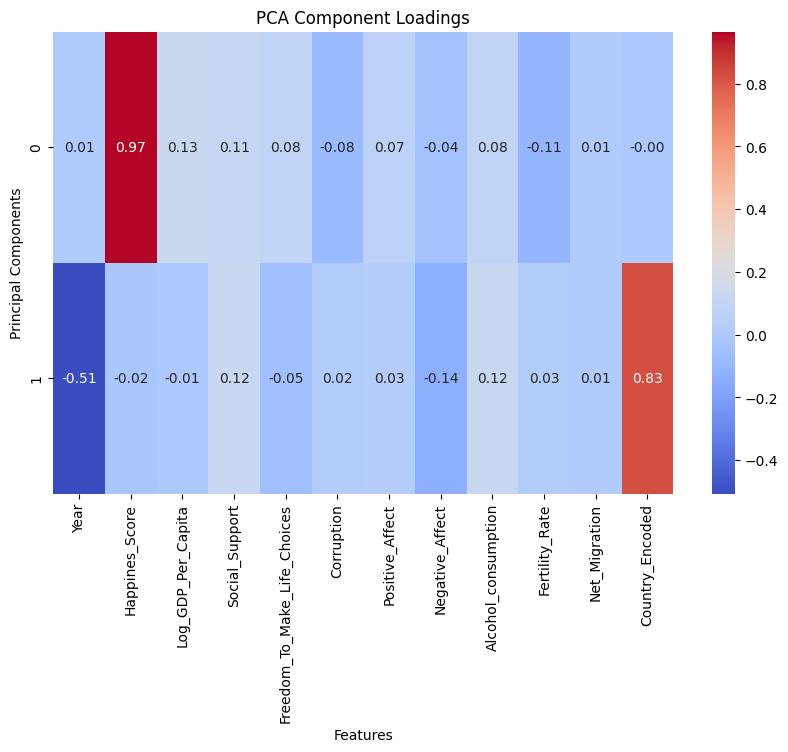

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the PCA components (loadings) as a DataFrame
components_df = pd.DataFrame(pca_2.components_, columns=X_train_num.columns)

# Create a heatmap of the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


In [ ]:
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'], index=X_train.index)
pca_df_with_name = pca_df.copy()
pca_df_with_name['Country_Name'] = X_train['Country_Name']
country_avg_df = pca_df_with_name .groupby('Country_Name')[['PC1', 'PC2']].mean().reset_index()

## K-Means With PCA

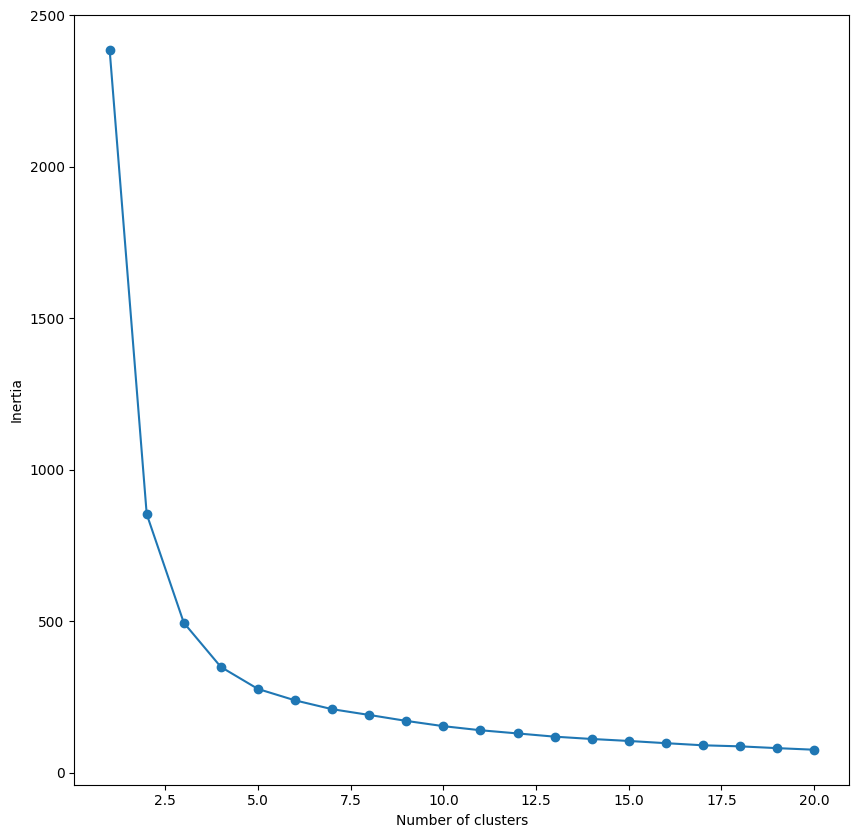

In [84]:
# elbow method to find a good number of clusters (k)
from sklearn.cluster import KMeans
cost = []

for i in range(1, 21):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    cost.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))

plt.plot(range(1, 21), cost, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

In [85]:
kmeans2 = KMeans(n_clusters=2,  random_state=42)
kmeans2.fit_predict(country_avg_df[['PC1', 'PC2']])
kmeans5 = KMeans(n_clusters=5,  random_state=42)
kmeans5.fit_predict(country_avg_df[['PC1', 'PC2']])
kmeans8 = KMeans(n_clusters=8,  random_state=42)
kmeans8.fit_predict(country_avg_df[['PC1', 'PC2']])



array([6, 0, 0, 1, 4, 1, 2, 2, 5, 0, 1, 0, 2, 6, 0, 0, 0, 6, 4, 1, 1, 6,
       1, 1, 2, 6, 6, 4, 0, 4, 6, 1, 6, 2, 0, 0, 4, 2, 5, 0, 0, 1, 4, 7,
       1, 1, 2, 4, 1, 1, 1, 4, 1, 0, 4, 6, 6, 0, 0, 0, 2, 1, 5, 5, 1, 2,
       2, 4, 1, 7, 7, 5, 7, 1, 7, 4, 5, 5, 7, 1, 6, 6, 0, 7, 2, 6, 6, 7,
       6, 4, 1, 7, 4, 7, 5, 5, 5, 1, 1, 1, 5, 2, 2, 7, 6, 5, 5, 2, 5, 4,
       7, 7, 5, 7, 7, 4, 7, 7, 3, 4, 1, 5, 3, 4, 7, 7, 5, 5, 5, 7, 3, 4,
       1, 1, 2, 2, 1, 4, 5, 3, 7, 3, 7, 1, 7, 5, 1, 5, 4, 2, 2, 4, 7, 7,
       5, 3, 1, 3])

In [86]:
import plotly.express as px
import pandas as pd

# Assuming `pca_df_with_name` contains the PCA components, K-means labels, and country names
# Group the data by country and calculate the mean for each country's PCA scores
country_avg_df = pca_df_with_name.groupby('Country_Name')[['PC1', 'PC2']].mean().reset_index()

# Add the K-means labels to the averaged dataframe
country_avg_df['KMeans_2_Labels'] = kmeans2.labels_
country_avg_df['KMeans_5_Labels'] = kmeans5.labels_
country_avg_df['KMeans_8_Labels'] = kmeans8.labels_

# Plot for k=2 clusters with averaged country data
fig_2 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_2_Labels',  # Color by k=2 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=2 Clusters (Averaged by Country)",
                   labels={'KMeans_2_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_2.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_2.update_layout(
    title="K-means Clustering with k=2 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the first figure (k=2)
fig_2.show()

# Plot for k=5 clusters with averaged country data
fig_5 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_5_Labels',  # Color by k=5 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=5 Clusters (Averaged by Country)",
                   labels={'KMeans_5_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_5.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_5.update_layout(
    title="K-means Clustering with k=5 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the second figure (k=5)
fig_5.show()

# Plot for k=8 clusters with averaged country data
fig_8 = px.scatter(country_avg_df, 
                   x='PC1', y='PC2', 
                   color='KMeans_8_Labels',  # Color by k=8 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=8 Clusters (Averaged by Country)",
                   labels={'KMeans_8_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_8.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_8.update_layout(
    title="K-means Clustering with k=8 (Averaged by Country)",
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the third figure (k=8)
fig_8.show()


## T-SNE

In [67]:
# Reducing dimensions using t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
tsne_data = tsne.fit_transform(X_train_num)

tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'], index=X_train_num.index)
tsne_df_with_name = tsne_df
tsne_df_with_name['Country_Name'] = X_train['Country_Name']

In [80]:
country_avg_df = tsne_df_with_name.groupby('Country_Name')[['t-SNE1', 't-SNE2']].mean().reset_index()
kmeans2 = KMeans(n_clusters=2,  random_state=42)
kmeans2.fit_predict(country_avg_df[['t-SNE1', 't-SNE2']])
kmeans5 = KMeans(n_clusters=5,  random_state=42)
kmeans5.fit_predict(country_avg_df[['t-SNE1', 't-SNE2']])
kmeans8 = KMeans(n_clusters=8,  random_state=42)
kmeans8.fit_predict(country_avg_df[['t-SNE1', 't-SNE2']])

array([7, 3, 3, 5, 2, 5, 4, 4, 3, 6, 5, 0, 4, 1, 3, 6, 0, 7, 2, 5, 1, 7,
       1, 1, 4, 7, 7, 2, 3, 6, 7, 1, 7, 4, 0, 6, 2, 4, 3, 3, 6, 5, 6, 6,
       7, 1, 4, 2, 1, 1, 5, 2, 1, 0, 2, 1, 7, 3, 3, 0, 4, 1, 3, 5, 5, 2,
       4, 6, 1, 6, 6, 3, 6, 1, 6, 6, 0, 5, 0, 5, 7, 1, 6, 0, 4, 1, 7, 6,
       1, 6, 1, 6, 2, 0, 0, 0, 5, 1, 5, 5, 5, 4, 4, 6, 1, 5, 5, 4, 5, 6,
       0, 0, 0, 0, 0, 6, 0, 0, 7, 6, 1, 0, 7, 6, 0, 0, 5, 5, 5, 0, 7, 0,
       5, 5, 4, 4, 7, 6, 5, 7, 6, 7, 0, 5, 0, 3, 7, 5, 6, 6, 6, 6, 0, 0,
       3, 7, 5, 7])

In [82]:
import plotly.express as px
import pandas as pd

# Assuming `pca_df_with_name` contains the PCA components, K-means labels, and country names
# Group the data by country and calculate the mean for each country's PCA scores

# Add the K-means labels to the averaged dataframe
country_avg_df['KMeans_2_Labels'] = kmeans2.labels_
country_avg_df['KMeans_5_Labels'] = kmeans5.labels_
country_avg_df['KMeans_8_Labels'] = kmeans8.labels_

# Plot for k=2 clusters with averaged country data
fig_2 = px.scatter(country_avg_df, 
                   x='t-SNE1', y='t-SNE2', 
                   color='KMeans_2_Labels',  # Color by k=2 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=2 Clusters (Averaged by Country)",
                   labels={'KMeans_2_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_2.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_2.update_layout(
    title="K-means Clustering with k=2 (Averaged by Country)",
    xaxis_title="t-SNE1",
    yaxis_title="t-SNE2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the first figure (k=2)
fig_2.show()

# Plot for k=5 clusters with averaged country data
fig_5 = px.scatter(country_avg_df, 
                   x='t-SNE1', y='t-SNE2', 
                   color='KMeans_5_Labels',  # Color by k=5 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=5 Clusters (Averaged by Country)",
                   labels={'KMeans_5_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_5.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_5.update_layout(
    title="K-means Clustering with k=5 (Averaged by Country)",
    xaxis_title="t-SNE1",
    yaxis_title="t-SNE2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the second figure (k=5)
fig_5.show()

# Plot for k=8 clusters with averaged country data
fig_8 = px.scatter(country_avg_df, 
                   x='t-SNE1', y='t-SNE2', 
                   color='KMeans_8_Labels',  # Color by k=8 cluster labels
                   hover_name='Country_Name',  # Show country names on hover
                   title="K-means with k=8 Clusters (Averaged by Country)",
                   labels={'KMeans_8_Labels': 'Cluster'},
                   opacity=0.7,  # Adjust opacity for points
                   text='Country_Name'  # Add country names as text
                  )

# Customize the layout (optional)
fig_8.update_traces(
    marker=dict(size=10, opacity=0.7, line=dict(width=2, color='DarkSlateGrey')),
    textposition='top right'  # Position the text to the top-right of the points
)

# Update the layout to increase spacing
fig_8.update_layout(
    title="K-means Clustering with k=8 (Averaged by Country)",
    xaxis_title="t-SNE1",
    yaxis_title="t-SNE2",
    legend_title="Cluster",
    width=1000,  # Increase width of the plot
    height=600,  # Increase height of the plot
    margin=dict(l=100, r=100, t=100, b=100)  # Increase margins for more space
)

# Show the third figure (k=8)
fig_8.show()


## Hierarchical Clustering

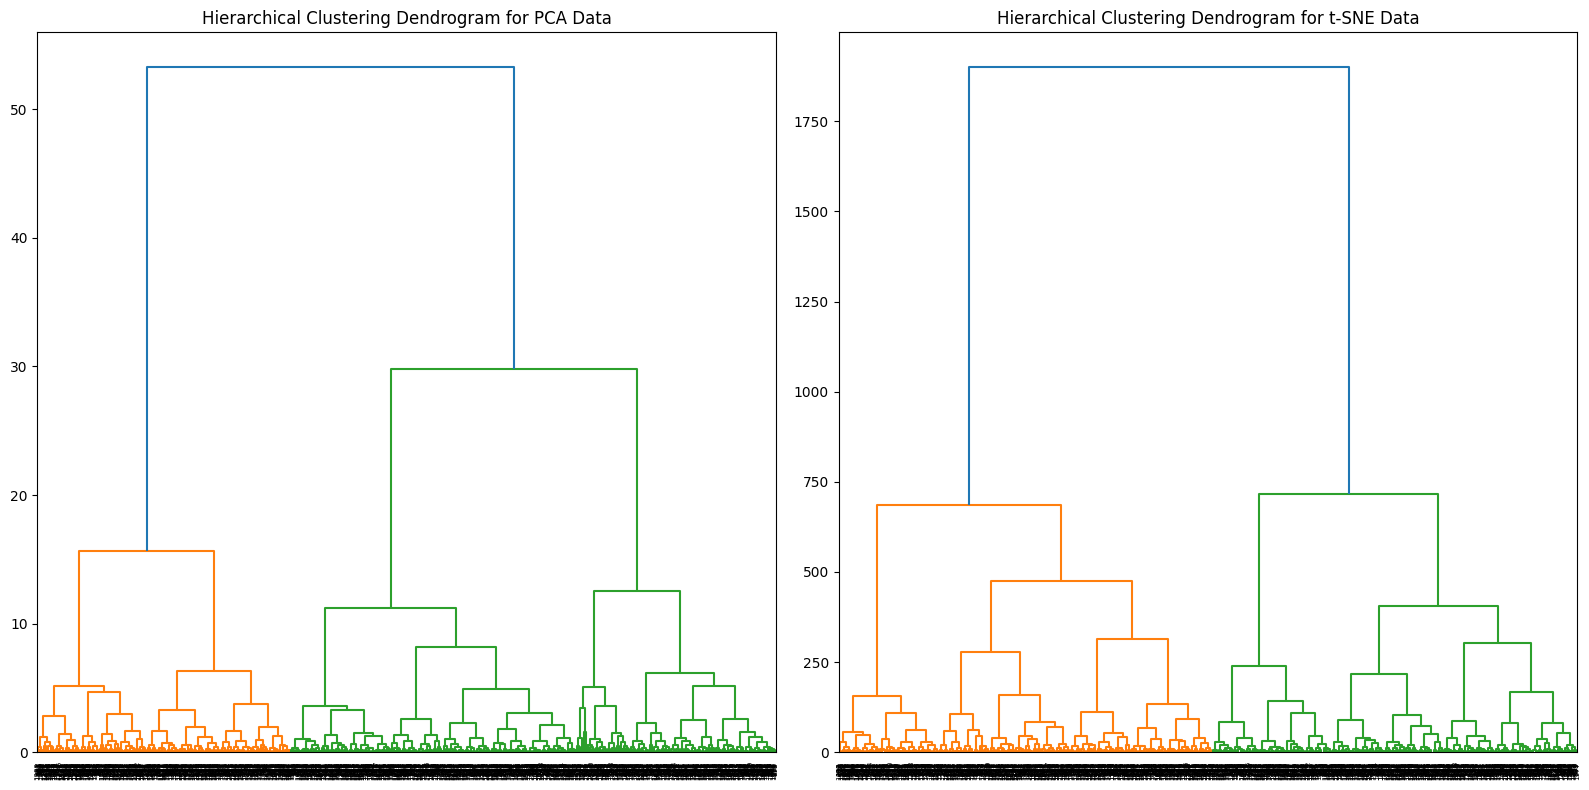

In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

# Create clustering for PCA data
hierarchical_pca = AgglomerativeClustering(n_clusters=15, linkage='ward')
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_df)

# Create clustering for t-SNE data
hierarchical_tsne = AgglomerativeClustering(n_clusters=15, linkage='ward')
hierarchical_tsne_labels = hierarchical_tsne.fit_predict(tsne_df[['t-SNE1', 't-SNE2']])

# Create subplots for dendrograms
fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Dendrogram for PCA data
linkage_matrix_pca = ward(pca_df)
dendrogram(linkage_matrix_pca, ax=ax[0])
ax[0].set_title('Hierarchical Clustering Dendrogram for PCA Data')

# Dendrogram for t-SNE data
linkage_matrix_tsne = ward(tsne_df[['t-SNE1', 't-SNE2']])
dendrogram(linkage_matrix_tsne, ax=ax[1])
ax[1].set_title('Hierarchical Clustering Dendrogram for t-SNE Data')

# Show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


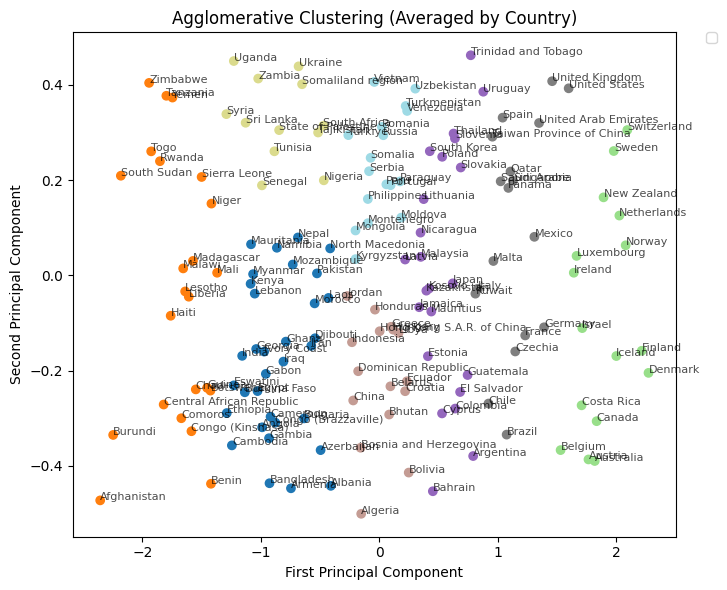

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming 'pca_df' contains PCA components and 'Country_Name' column
# Calculate the mean PCA values per country
country_avg_df = pca_df_with_name.groupby('Country_Name')[['PC1', 'PC2']].mean().reset_index()

# Perform Agglomerative Clustering on PCA components
agg_clustering = AgglomerativeClustering(n_clusters=8)
agg_labels = agg_clustering.fit_predict(country_avg_df[['PC1', 'PC2']])

# Add the clustering labels to the country average DataFrame
country_avg_df['Cluster'] = agg_labels

# Plotting
plt.figure(figsize=(20, 6))

# Plot 1: Agglomerative Clustering (with countries averaged by country mean)
plt.subplot(131)
plt.scatter(country_avg_df['PC1'], country_avg_df['PC2'], c=country_avg_df['Cluster'], cmap='tab20')

# Add country labels to the plot
for i, row in country_avg_df.iterrows():
    plt.text(row['PC1'], row['PC2'], row['Country_Name'], fontsize=8, alpha=0.7)

plt.title('Agglomerative Clustering (Averaged by Country)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Optional: Adjust legend to show clusters
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
